# **Portfolio Project-Supervised Learning Models Predicting Imbalanced Email Spam Data**



## Rob Boswell

---
---

### In this portfolio project, I analyze and use features from the following email spam dataset located on the UCI Machine Learning Repository in order to classify emails as either spam or non-spam:
https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/


### Descriptions of the features used are found at:
https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names



### **Part 1.**  

### Import the spam dataset and display the first 5 rows.  


---



---


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


In [2]:
#Please note that the spam_dataset.csv file that I import can be found at: "https://github.com/roboswell/data/blob/main/spam_dataset.csv"
#The spam_dataset.csv file in my "data" Github repository was reconstructed from the original dataset 
#(https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data) to include all 57 feature names and target name 'spam'.

url = 'https://github.com/roboswell/data/raw/main/spam_dataset.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Note: The target variable is "spam", where 1 indicates that an email is spam and 0 otherwise. 

---

### **Part 2.** 

### Below, before actually creating any models I discuss three variables in the dataset that I think would be important predictors in a model of spam, and why:

---

---


### I think that word_freq_receive, word_freq_free, and word_freq_money are the variables in the dataset likely to be the most important predictors of spam. 

$~$

### **1)** For the feature ***word_freq_free***, the more often a single email contains the word "free" it is likely to be the case that businesses, organizations, or individuals are sending such emails to lure the recipient into believing that they will receive free items by responding to the email. People naturally like free things, and so it is a very common marketing or scam strategy to promise "free" items to those who respond to advertisements. As a result, I think that a spam filtering program would be very likley to try to search for this variable. 

$~$

### **2)** Since the feature ***capital_run_length_total*** is defined as the "sum of length of uninterrupted sequences of capital letters" in an email, it seems reasonable to me that the more capitalized words used in an email, the more the sender is trying to get the attention of any given recipient, on average, than the sender would if they only capitalized the beginning of sentences, acronyms, and the beginning of proper nouns. E.g., writing an entire sentence in capitalized letters is often interpreted as "shouting" at someone by email. Therefore, since more sequential capitalized letters in any given email on average is likely predictive of a given sender's attempt to get a receiver's attention, thus suggesting that the sender likely believes the recipient normally may not read their email if they do not use many capitalized letters in words, it would seem that spam filtering programs would definitely try to filter out emails with a lot of words that are capitalized. 

$~$

### **3)** For the feature ***word_freq_money***, the more often a single email references the word "money" it is likely to be the case that businesses, organizations, or individuals are sending such emails to lure the recipient into believing that if they respond to the email they will be able to obtain money. People naturally like money, and so promising money is often a common marketing strategy by companies and scammers to try to get people to respond. E.g., (trustworthy or untrustworthy) temporary staffing agencies may use the word money in emails to try to attract recipients into responding to apply for jobs that are promised to provide more money than what they may make with their current job. As a result, I think that a spam filtering program would be very likley to try to search for this variable.

---


### **Part 3.**  

### Here, I visualize the univariate distribution of each of the three variables discussed above. 

---
---

Text(0, 0.5, 'Count')

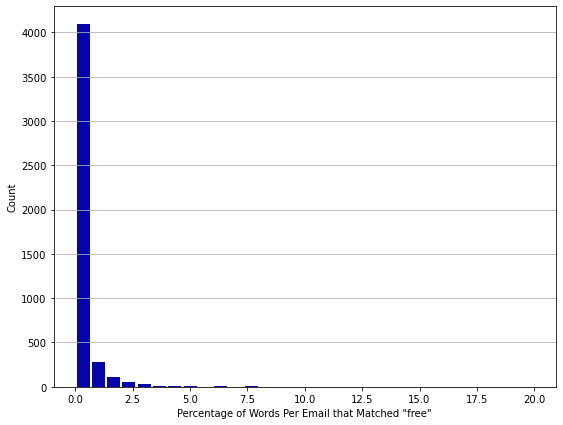

In [ ]:
from matplotlib import pyplot as plt

# 1) Histogram of word_freq_free:
plt.figure(figsize=(9,7))
n, bins, patches = plt.hist(x=df['word_freq_free:'], bins=30, color='#0504aa', rwidth=0.85)
plt.grid(axis='y')
plt.xlabel('Percentage of Words Per Email that Matched "free"')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

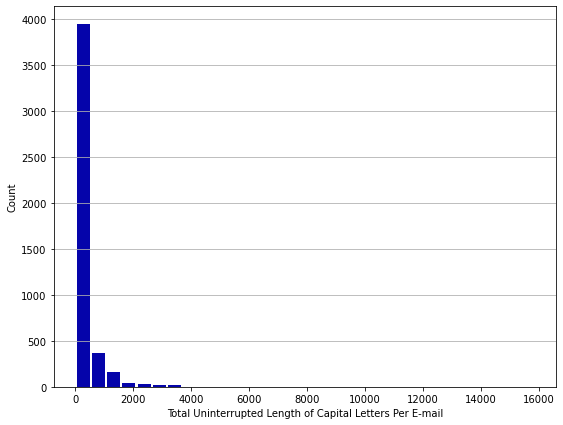

In [ ]:
# 2) Histogram of capital_run_length_total: 
plt.figure(figsize=(9,7))
n, bins, patches = plt.hist(x=df['capital_run_length_total:'], bins=30, color='#0504aa', rwidth=0.85)
plt.grid(axis='y')
plt.xlabel('Total Uninterrupted Length of Capital Letters Per E-mail')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

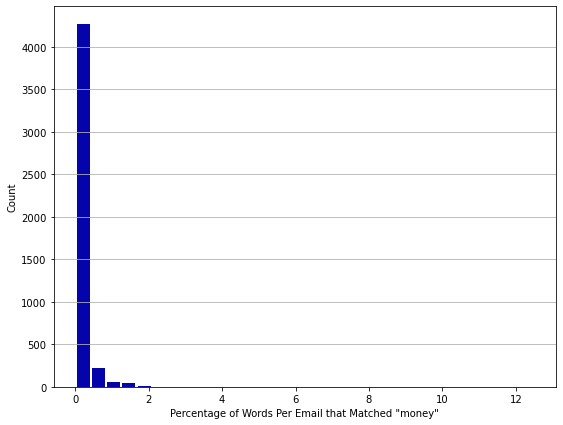

In [ ]:
# 3) Histogram of word_freq_money:
plt.figure(figsize=(9,7))
n, bins, patches = plt.hist(x=df['word_freq_money:'], bins=30, color='#0504aa', rwidth=0.85)
plt.grid(axis='y')
plt.xlabel('Percentage of Words Per Email that Matched "money"')
plt.ylabel('Count')

---

### **Part 4:** 

### Below, I describe the importance of training and test data. I explain why we need to separate data into these subsets.

---

---


### Splitting our data into training and test data is important for the following reasons: Our main purpose in machine learning is to predict unseen data as well as possible. We need to essentially fake unseen data somehow in a way that allows us to see if our model will be able to generalize well if used on truly unseen data.

$~$

### In general, we randomly place around 75% - 90% - of all our observations (both for our features and our target) in our data into a training data set, while the remaining portion is placed in our test data set. We fit our model with our training data, but we set aside our test data so that our model never sees it until the point in time when we will evaluate the model to estimate how well it would perform on unseen data.


---



### **Part 5:** 

### Below, I discuss what K-fold cross validation is and what we use it for:

---

---


### **Answer:** 

### The idea behind K-fold cross validation is that when we train-test-split our data such that observations are randomly selected into either the training data set or the test data set, it is always possible that the observations now comprising the training data set and test data set are not sufficiently randomly distributed to lead to unbiased predictions when we eventually use our model on actual unseen data. To obtain unbiased results, we want our model tested on held out data that accurately represent as much as possible what truly unseen data would look like.

$~$

### If we can use a system (i.e., cross validation) where we can continue to systemmatically and randomly shuffle our observations a number of times into either the training or test set, fitting our data each time to our models, calculating the predictive strength of our models each time, and then averaging our calculations across all "folds" - then we can be more confident that the combinations of observations that happen to be in either our training or test sets will not bias our model's results, and these results are more likely to be representative of the predictive strength that we would calculate if we were testing our models on truly unseen data. Our results are thus more likely to be robust than if we relied on a one time shuffled training and test set. Cross validation also allows us to compare numerous machine learning models in terms of scoring metrics of predictive strength across the same cross validation data in order to have a safe way of estimating which model would likely perform the best on truly unseen data.

$~$

### In practice, K-fold cross validation works as follows: Cross validation takes just our ***original training set*** to work with. We specify how many different "folds" (i.e., segments) of *this data* we will use iteratively to be designated as our cross validation "test set", one at a time. If we choose K=5, e.g., it would divide our training data into 5 sections (i.e., each section would hold 20% of our data), allowing us to iteratively use each of the 5 sections as a test set, one at a time, with the other 80% of the data for each of the 5 iterations being used as training sets. I.e., this means we would be working with 5 different cross validation test sets and 5 different cross validation training sets. It is important to remember that we use random selection without replacement when we generate each fold. 

$~$

### We could begin with the first fold/section of our data being used as our held-out test data set, and all remaining folds (constituting 80% of our data) being used as "training data." We would then establish a prediction metric score when the first of the five folds are used as the test data set. Next, we would use the second 20% segment of the data as the held-out "test data," (with the other 80% of the data used as our "training data") and calculate a prediction metric score. We would then use the next 20 % of the data (i.e. our third fold) as the held-out test data set with the remaining 80% of the data as our "training data set," again establishing a prediction metric score. We would repeat this for all 5 folds, then average all 5 of the resulting prediction metric scores together to obtain as our overall score for that model.

$~$

### This process would be the same, e.g. if we set K equal to another value like K=10. The only difference in this case would be that each fold in the data would comprise 10% of the data to be used as our held-out "test" data set at a time (instead of 20% when K=5) while the remaining 90% of the data would be used as our "training" data set. We would still take the average of all 10 prediction metric scores generated to use as our overall K-fold cross validation score when K=10. 


---





### **Part 6:** 

### Below, I discuss how is K-fold cross validation is different from stratified K-fold cross validation:

---

---


### **Answer:** 

### K-fold cross validation is different from stratified K-fold cross validation in the following way:

$~$

### K-fold cross validation does not pay special attention to ensure that observations randonly selected into each fold have class frequencies in proportion to the class frequencies in the *entire* training dataset. However, stratified K-fold cross validation randomly selects observations into "training" data sets and "test" data sets from the *overall* training dataset but does so in a way that makes sure that class frequencies within each "training" and "test" set for each split are consistent with the class frequencies found in the *overall* training dataset.

$~$

### K-fold cross validation is especially useful when there may be extreme class imbalances in our dataset to help ensure prediction accuracy scores are valid. If our data has severe class imbalances, it could very well be the case that a given "training" dataset established by K-fold cross validation may not have any or very few observations with minority classes in them to train the model on. This could lead K-fold cross validation metric scores to be misleading and could lead a model to not predict well on unseen data. 


---



### **Part 7:** 

### For this portfolio project, I will use four different types of models to classify email texts as either spam or non-spam. These models include:

*   KNN Classification
*   L1 Penalized Logistic Regression
*   L2 Penalized Logistic Regression
*   Random Forest Classification

### I will split the dataset into training and test sets. I will then build models with the three features mentioned above that I think will be good predictors of "spam". I will then describe why I chose particular parameters for my models. Then I will evaluate the prediction strength of my models in two ways: A) On K-fold cross validation data and B) on test set data directly.

$~$

### **Note:** It should be kept in mind that cross validation prediction scores are often a better indicator of a model's generalizability to truly unseen data than test set prediction scores. The reason why is because "held out" test set data relies on a single random train-test-split. In contrast, cross validation takes the training set portion of that single train-test-split, and then randomly splits it again in K different ways (e.g., in the case of K-fold cross validation) such that there are K train and test sets with which to train and test models. An average of the scoring metrics across the K folds is taken to construct an overall cross validation score. As a result, cross validation-based scores are a more robust inidication for likelihood of actual performance on truly unseen data than are test set scores. <u> I therefore rely on cross validation scores rather than test set scores when I rank different models in terms of their performance. </u>* 

$~$

### However, test set scores are also important because they give you a final measurement of your complete model building processes - including feature engineering and feature selection decisions, choice of algorithm, parameters selected and deemed optimal through hypertuning using GridSearchCV or another procedure, the type of cross validation used (e.g., K-fold cross validation vs. stratified cross validation, among others), and the number of folds/splits used during cross validation - all of which have the potential to lead to overfitting or underfitting on test data and therefore also on truly unseen data.

$~$

### E.g., a test set score which is much lower than a cross validation score for a particular model can inform analysts that the model is likely overfitting to the training data, while a test set score which is much higher than a cross validation score for a particular model can inform analysts that the model is likely underfitting to the training data. In either case, the model would likely not perform on truly unseen data at the same level of performance indicated by the cross validation score. Knowing whether a model has overfit or underfit to the data can help an analyst know, e.g., whether they need to include more or less data, engineer their features in a different way, hypertune for and implement different parameter values, or use a different cross validation approach to try to improve the model fit. Ultimately, a better model fit as indicated by a close relationship between the cross validation score and test set score will mean the cross validation score is more reliably indicative of the approximate score likely to be achieved by the final model if used on truly unseen data (e.g., in a production setting).

---
---



In [3]:
#Here, I create X (feature) data and y (target) data from the dataset

y = df['spam']
X = df.loc[:, df.columns != 'spam']

X.head()

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [ ]:
#Next, I include just my 3 prefered features out of the complete dataset, and label this X3

y = df['spam']
X3 = df.loc[:, ['word_freq_free:', 'capital_run_length_total:', 'word_freq_money:']]

X3.head()

,word_freq_free:,capital_run_length_total:,word_freq_money:
0,0.32,278,0.00
1,0.14,1028,0.43
2,0.06,2259,0.06
3,0.31,191,0.00
4,0.31,191,0.00


### **Note:** From the following code, we can see that the classes are marginally imbalanced, with 61% of observations being non-spam, and 39% being spam. Even though the imbalance in the data is marginal, since it is possible that the presence of imbalanced data can lead to biased results, I will implement a resampling technique to balance the classes. Specifically, I use the Synthetic Minority Oversampling Technique (SMOTE) in order to randomly generate new synthetic observations so that the two classes become balanced. 

$~$

### SMOTE is generally regarded as a more promising technique for balancing imbalanced data than other techniques. In short, SMOTE randomly selects a given observation's K nearest neighbors, and then the difference is taken between this neighboring observation's values and the original observation's values being evaluated. This difference is then multiplied by a random value between 0 and 1, creating a new synthetic observation that is added to the dataset. The process continues until the overall data is balanced between classes.

In [ ]:
print(pd.Series(y).value_counts(normalize=True))

0    0.605955
1    0.394045
Name: spam, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=64)
X3_sm, y_sm = smote.fit_resample(X3, y)

print(pd.Series(y_sm).value_counts(normalize=True))



1    0.5
0    0.5
Name: spam, dtype: float64


In [ ]:
#Here, I train test split X3 and y
from sklearn.model_selection import train_test_split

X3_train, X3_test, y_train, y_test = train_test_split(X3_sm, y_sm, random_state=64)

In [ ]:
#Next, I scale the data using Scikit-Learn's StandardScaler, which makes the mean of each feature = 0 and the standard deviation = 1.
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X3_train)
X3_train_scaled = scaler.transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

#Note: One hot encoding is not necessary for this dataset because all features are numeric variables

### <u> KNN Classification: </u>

### **Choosing the Best Parameter for KNN Classification:** The default value for n_neighbors for KNN is 5. However, since 5 may not be the best parameter for n_neighbors, GridSearchCV will tune the model to discover which parameter for n_neighbors will return the best cross validation weighted F1 score. Since KNN Classifier takes the minimum Euclidean distance between a given observation and its *n* nearest neighbors and uses a "majority vote" to predict the class of the observation for the dependent variable under examination, it is important for GridSearchCV to look just at odd numbers for *n* such that there cannot be any ties.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold



#KNN Classification and GridSearchCV
 

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
print(knn_pipe.steps)




[('standardscaler', StandardScaler()), ('kneighborsclassifier', KNeighborsClassifier())]


In [ ]:
#GridSearchCV for hypertuning parameters

#By default, GridSearchCV uses cv = 5 for K-fold cross validation. However, if you specify an integer for the argument cv 
#Scikit-Learn will then automatically use stratified K-Fold instead of K-fold cross validation for GridSearchCV. Therefore, 
#I refrain from specifying an integer value for the cv argument. 
#See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html for more details.

param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1, 25, 2)} 
grid = GridSearchCV(knn_pipe, param_grid, scoring='f1_weighted', n_jobs=-1)
grid.fit(X3_train_scaled, y_train)

#A) Scoring the model using K-fold cross validation data with the number of folds = 5

print("KNN Classification - Best Mean Cross Validation F1 Score (Scaled): {:.4f}".format(grid.best_score_))
print("Best Parameters: {}".format(grid.best_params_))



KNN Classification - Best Mean Cross Validation F1 Score (Scaled): 0.8093
Best Parameters: {'kneighborsclassifier__n_neighbors': 7}


### GridSearchCV iterated through all odd numbered K nearest neighbor options between 1 and 25 and found that 7 is the n_neighbors parameter value that predicts best with the least complex model (i.e., lowest parameter value for K that predicts the highest F1 score). Note that the F1 score is the harmonic mean between precision and recall such that the F1 score = 2 * (precision * recall) / (precision + recall). While Scikit-Learn's default type of F1 score is "binary", meaning that the results are only reported for the positive class, I instead use the "weighted" F1 score which calculates the average of the F1 scores of all classes.

### Now that we know the best parameter for K is 7, we can construct our KNN classification model with 7 as the value for K and test the model on B) our test data directly.

In [ ]:
from sklearn.metrics import f1_score

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X3_train_scaled, y_train)

#B) Scoring the model on test set data directly

y_preds_knn = knn.predict(X3_test_scaled)
print("KNN Classification Test Set F1 Score (Scaled): {:.4f}".format(f1_score(y_test, y_preds_knn, average='weighted')))

KNN Classification Test Set F1 Score (Scaled): 0.7938


### **Answer:**

### The KNN Classification K-fold Cross Validation F1 Score: **<u>0.8093</u>**

### The KNN Classification Test Set F1 Score: **0.7938**







---

### **Part 8:** 

### <u> L1 Penalized Logistic Regression: </u>

### I once again will evaluate model predictive strength: A) using K-fold cross validation data and B) on test set data directly. I will also compare this model's performance to my previous model.
---

---


### **The difference between L1 and L2 regularized logistic regression:** L1 and L2 regularization both help to prevent logistic regression models from overfitting. Because both methods shrink down coefficients, they also have the benefit of enabling analysts to extract feature importance based on the resulting coefficients. L1 regularization creates a tunable penalty equal to λ times the sum of the absolute values of the parameters, while L2 regularization creates a tunable penalty equal to λ times the sum of the squares of the parameters. Scikit-Learn uses the tuning parameter C which equals the inverse of λ. A smaller value of C implies a higher penalty in both L1 and L2 regularization.

### **L1 Penalized Logistic Regression - Choosing the Best Parameter:**  L1 penalized logistic regression has the goal of shrinking the beta coefficients in the model such that features without much predictive power result in their beta coefficients shrinking all the way to 0, while only those features with some predictive power result in their beta coefficients remaining in the model. This tends to increase the strength of predictions.

$~$

### As we decrease the value of C we increase the strength of the penalty in terms of how much the model's beta coefficients are forced to shrink. Therefore, the optimal C parameters for L1 penalized logistic regression tend to be low values. If we were to use a very high value for C such as 1e90, the logistic regression model would interpret this as unpenalized logistic regression.

$~$

### I will tune the range of C values, using GridSearchCV, from 10e-5 to 10e5. Since (in general) the lower the value of C the higher the penalty, the lower the resulting beta coefficients, and the higher the prediction strength, I believe the optimal value of C will be far less than 10e5.

$~$

### The more times the model iterates through the more (in general) L1 penalized logistic regression can shrink betas, but at a certain point there is a cap to how much iteration increases predictive strength. I choose a high value for max_iter (100,000).



In [ ]:
#L1 Penalized Logistic Regression and GridSearchCV
from sklearn.linear_model import LogisticRegression

l1_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', max_iter=100000, random_state=64, solver='liblinear'))
print(l1_pipe.steps)


[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression(max_iter=100000, penalty='l1', random_state=64,
                   solver='liblinear'))]


In [ ]:
#GridSearchCV:
param_grid = {'logisticregression__C': np.logspace(-5,5)} #This tunes C from 10e-5 to 10e5.
grid = GridSearchCV(l1_pipe, param_grid, scoring='f1_weighted', n_jobs=-1)
grid.fit(X3_train_scaled, y_train)

#A) Scoring the model using K-fold cross validation data with the number of folds = 5

print("L1 Penalized Logistic Regression - Best Mean Cross Validation F1 Score (Scaled): {:.4f}".format(grid.best_score_))
print("Best Parameters: {}".format(grid.best_params_))

L1 Penalized Logistic Regression - Best Mean Cross Validation F1 Score (Scaled): 0.7777
Best Parameters: {'logisticregression__C': 0.7906043210907702}


In [ ]:
l1_3 = LogisticRegression(penalty='l1', C=0.7906043210907702, random_state=64, solver='liblinear')
l1_3.fit(X3_train_scaled, y_train)

#B) Scoring the model on test set data directly

y_preds_l1 = l1_3.predict(X3_test_scaled)

print("L1 Penalized Logistic Regression Test Set F1 Score (Scaled): {:.4f}".format(f1_score(y_test, y_preds_l1, average='weighted')))

L1 Penalized Logistic Regression Test Set F1 Score (Scaled): 0.7600


### **Answer:** 

### The L1 Penalized Logistic Regression K-fold Cross Validation F1 Score: **<u>0.7777</u>**

### The L1 Penalized Logistic Regression Test Set F1 Score: **0.7600**


$~$

### L1 Penalized Logistic Regression *did not* predict better than my previous model (KNN Classification) because the KNN Classification K-fold Cross Validation F1 score was **<u>0.8093</u>**.
 

---


### **Part 9:** 

### <u> L2 Penalized Logistic Regression: </u>

### I once again will evaluate prediction strength: A) On K-fold cross validation data and B) on test set data directly . I will also compare this model's performance to my previous models.

---
---

### **L2 Penalized Logistic Regression - Choosing the Best Parameter:**

### L2 penalized logistic regression has the goal of shrinking the beta coefficients in the model such that features without much predictive power result in their beta coefficients shrinking, but not quite to 0. The beta coefficients for those predictors with more predictive power will be higher than the beta coefficients with less predictive power. Shrinking the coefficients in this way also tends to increase models' predictive strength. 

$~$

### Like L1 penalized logistic regression, with L2 penalized logistic regression as we decrease the value of C we increase the strength of the penalty in terms of how much the model's beta coefficients are forced to shrink. Therefore, optimal C parameter values for L2 penalized logistic regression also tend to be low.

$~$

### With L2 penalized logistic regression I will also hypertune C using GridSearchCV between the range of 10e-5 to 10e5. Since (in general) the lower the value of C the higher the penalty, the lower the beta coefficients, and the higher the predictive strength, I believe that in all likelihood the optimal value of C will be far less than 10e5.

$~$

### The more the model iterates through the more (in general) L2 penalized logistic regression also can shrink betas, but - again - at a certain point there is a cap to how much iteration helps improve predictions. I choose a high value for max_iter (100,000) to try to increase my model's predictive strength as much as possible.


In [ ]:
#L2 Penalized Logistic Regression and GridSearchCV
from sklearn.linear_model import LogisticRegression

l2_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', max_iter=100000, random_state=64))
print(l2_pipe.steps)

[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression(max_iter=100000, random_state=64))]


In [ ]:
param_grid = {'logisticregression__C': np.logspace(-5,5)} #This tunes C from 10e-5 to 10e5.
grid = GridSearchCV(l2_pipe, param_grid, scoring='f1_weighted', n_jobs=-1)
grid.fit(X3_train_scaled, y_train)

#A) Scoring the model using K-fold cross validation data with the number of folds = 5

print("L2 Penalized Logistic Regression - Best Mean Cross Validation F1 Score (Scaled): {:.4f}".format(grid.best_score_))
print("Best Parameters: {}".format(grid.best_params_))

L2 Penalized Logistic Regression - Best Mean Cross Validation F1 Score (Scaled): 0.7775
Best Parameters: {'logisticregression__C': 3.2374575428176464}


### **GridSearchCV's Identified Best C Parameter for L2 Penalized Logistic Regression: 3.2374575428176464** 

In [ ]:
l2_3 = LogisticRegression(C=3.2374575428176464, penalty='l2', max_iter=100000, random_state=64)
l2_3.fit(X3_train_scaled, y_train)

#B) Scoring the model on test set data directly

y_preds_l2 = l2_3.predict(X3_test_scaled)

print("L2 Penalized Logistic Regression Test Set F1 Score (Scaled): {:.4f}".format(f1_score(y_test, y_preds_l2, average='weighted')))

L2 Penalized Logistic Regression Test Set F1 Score (Scaled): 0.7600


### **Answer:** 

### The L2 Penalized Logistic Regression K-fold Cross Validation F1 Score: **<u>0.7775</u>**

### The L2 Penalized Logistic Regression Test Set F1 Score: **0.7600**


$~$

### L2 Penalized Logistic Regression predicted slightly worse than my L1 Penalized Logistic Regression model (which had a K-fold cross validation F1 score of **<u>0.7777</u>**). However, KNN Classification had a better cross validation F1 score (**<u>0.8093</u>**) than either the L1 or L2 Penalized Logistic Regression models.

---


### **Part 10:** 

### <u> Random Forests Classification: </u>

$~$

### I once again will evaluate prediction strength: A) On K-fold cross validation where K=5 and B) on test set data directly.

---

---

### **Random Forests - Choosing the Best Parameter:**

### There are several different hyperparameters that can be helpful to tune when using Random Forest Classification:

$~$

### The higher the number of values tuned for on most of these hyperparameters, the longer it takes for the model to run and produce output. The key is to find values for the hyperparameters that still produce relatively high prediction accuracy scores while limiting the amount of time needed to run the model.  

$~$

*   **n_estimators** creates bootstrap datasets (synthetically created datasets that are randomly generated from the original dataset) which the model uses to expand the amount of data to train on. Generally, the higher the number of bootstrap datasets created with n_estimators, the more accurate my predictions should be. However, at some point adding each additional bootstrap dataset will lead to less and less of an increase in predictive strength. Using GridSearchCV, I originally tuned for a variety of ranges of n_estimators. I found that a maximum value for n_estimators of 10,000 returned a mean cross validation score of 0.8179. Yet, the time it took to run this model was about a half-hour. Since my goal is to have our models be minimally complex yet maximally accurate, I decided instead to tune n_estimators between 1 and 10. The time it now took to run the model decreased substantially, and my cross validation score actually increased. I therefore kept my tuning range between 1 and 2,000.

$~$

*   **max_depth** is the longest path created (based on the number of internal nodes created) between the root node and leaf node. The higher the value for max_depth the more preditive strength tends to increase, although there is a point at which each additional integer added for max_depth will lead to smaller and smaller increases in predictive strength. The higher the number of internal splits allowed by increasing the value on max_depth the larger will be the size and complexity of the tree. I selected my range for max_depth to be from 1 to 1,000.

$~$

*   **criterion** is the impurity measurement function used for determining the quality of each split for the categorical values on the dependent variable while conducting recursive binary splitting. It helps find at each split which features minimize node impurity, which ultimately increases prediction strength. The methods that can be used with classification (Gini Index vs. Cross-Entropy) are very similar in their methodological design. They are both measurements of classification purity whereby the smaller the value for the Gini Index or Cross-Entropy score the more purely your observations are being classified into correct categories on the target variable. I use GridSearchCV to determine which criterion leads to greater predictive strength.

$~$

*   **min_samples_leaf** allows you to control the number of observations permitted in each of the terminal nodes. Thus, an increased value for min_samples_leaf decreases the size of the decision trees in a model. It is possible that increasing min_samples_leaf will increase a model's predictive strength, but only up to a certain point. I chose a range from 1 to 100 to tune min_samples_leaf.

$~$

*   **max_features** is the number of features we permit our model to randomly allow for evaluation at each internal node. The idea behind max_features is that by limiting the number of features that can be evaluated at each internal node, you make your trees more different, which thus can help the generalizability of your model (decreasing the chances of your model overfitting) when it is tested on unseen data. Although the square root of the total number of features in a given data set is typically thought to be a good value to use for maximizing predictive strength on unseen data, I wanted to see if for this particular data set there might be an even better max_feature value that would increase accuracy. I therefore tested for the full range of features in the data set. Since I have only 3 features in my model up to this point (but will include more later), I will tune for a max_features range of 1 to 3.








In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=64))
print(rf_pipe.steps)

[('standardscaler', StandardScaler()), ('randomforestclassifier', RandomForestClassifier(random_state=64))]


In [ ]:
#GridSearchCV for hypertuning parameters

param_grid = {
    'randomforestclassifier__n_estimators': [1000, 1500, 2000],
    'randomforestclassifier__max_features': [1, 2, 3],
    'randomforestclassifier__max_depth': [None, 9, 18, 32],
    'randomforestclassifier__min_samples_leaf': [1, 10, 20],
    'randomforestclassifier__criterion': ['gini', 'entropy']}
grid = GridSearchCV(rf_pipe, param_grid, scoring='f1_weighted', n_jobs=-1)
grid.fit(X3_train_scaled, y_train)

#A) Scoring the model using K-fold cross validation data with the number of folds = 5

print("Random Forest Classification - Best Mean Cross Validation F1 Score (Scaled): {:.4f}".format(grid.best_score_))
print("Best Parameters: {}".format(grid.best_params_))

Random Forest Classification - Best Mean Cross Validation F1 Score (Scaled): 0.8226
Best Parameters: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 18, 'randomforestclassifier__max_features': 1, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 1000}


### **GridSearchCV's Identified Best Parameters for Random Forests Classification:**


*   ***Criterion:*** entropy
*   ***Max_depth:*** 18
*   ***Max_features:*** 1
*   ***Min_samples_leaf:*** 1
*   ***N_estimators:*** 1000







### Now that we know the optimal parameters within the range provided, we can use these to create a Random Forest model to find the level of predictive strength on test set data directly.

In [ ]:
rf_3 = RandomForestClassifier(criterion='entropy', max_depth=18, max_features=1, min_samples_leaf=1, n_estimators=1000, random_state=64)
rf_3.fit(X3_train_scaled, y_train)

#B) Scoring the model on test set data directly

y_preds_rf = rf_3.predict(X3_test_scaled)
print("Random Forest Classification Test Set F1 Score (Scaled): {:.4f}".format(f1_score(y_test, y_preds_rf, average='weighted')))

Random Forest Classification Test Set F1 Score (Scaled): 0.8141


### **Answer:**

### The Random Forests Classification K-fold Cross Validation F1 Score: **<u>0.8226</u>**

### The Random Forests Classification Test Set F1 Score: **0.8141**




### Random Forests Classification did perform better than all three of my previous models (KNN Classification, L1 Penalized Logistic Regression, and L2 Penalized Logistic Regression). Up to this point my best performing model was KNN Classification, which had a cross validation F1 score of **<u>0.8093</u>**. 

---


### **Part 11:** 

### Now I will rerun my best model (Random Forests), but this time add three new variables to the model that I think will increase predictive strength. I will see if this new model performs better than my previous models.

---

---

### The 3 extra variables I think will further increase the model's predictive strength are: 


*   word_freq_order:
*   word_freq_receive:
*   char_freq_!:

$~$

### ***word_freq_order:*** This feature may be predictive of spam because advertisers and scam artists alike have incentives to try to persuade ordinary people to order things from them. Alternatively, they may also have an incentive to try to deceive people into thinking they have an order that is ready for them if they respond to the email. The sender of an email may believe that high frequency use of the word "order" may persuade people to be more inclined to desire to order things or more likely to believe they have an order waiting for them if they respond.

$~$

### ***word_freq_receive:*** This feature may be predictive of spam because advertisers and scam artists alike have an incentive to try to lure people into thinking that they will receive items if they respond to an email. Naturally, most people like to receive things. Therefore, the sender of the email may be more inclined to think they will receive a response the more often they use the word "receive" in an email.

$~$

### ***char_freq_!:*** This feature may be predictive of spam because the use of an exclamation mark can have the purpose of trying to get the attention of someone or trying to excite them about an offer being advertised. The sender may believe that the more often they use exclamation marks the more often readers will in fact pay attention and become excited about any such offer.




In [4]:
#Here, I create a new datset that combines the three features I previously used as well as the three additional features mentioned above:

y = df['spam']
X6 = df.loc[:, ['word_freq_free:', 'capital_run_length_total:', 'word_freq_money:', 'word_freq_order:', 'word_freq_receive:', 'char_freq_!:']]

X6.head()


,word_freq_free:,capital_run_length_total:,word_freq_money:,word_freq_order:,word_freq_receive:,char_freq_!:
0,0.32,278,0.00,0.00,0.00,0.778
1,0.14,1028,0.43,0.00,0.21,0.372
2,0.06,2259,0.06,0.64,0.38,0.276
3,0.31,191,0.00,0.31,0.31,0.137
4,0.31,191,0.00,0.31,0.31,0.135


In [5]:
from imblearn.over_sampling import SMOTE

#I again use SMOTE to balance the classes:

smote = SMOTE(random_state=64)
X6_sm, y_sm = smote.fit_resample(X6, y)

print(pd.Series(y_sm).value_counts(normalize=True))

1    0.5
0    0.5
Name: spam, dtype: float64


In [7]:
#Train test split

X6_train, X6_test, y_train, y_test = train_test_split(X6_sm, y_sm, random_state=64)

In [10]:
#Scaling the data

scaler6 = preprocessing.StandardScaler().fit(X6_train)
X6_train_scaled = scaler6.transform(X6_train)
X6_test_scaled = scaler6.transform(X6_test)

### <u> Random Forest Classification: </u>

In [ ]:
#GridSearchCV for hypertuning parameters

param_grid = {
    'randomforestclassifier__n_estimators': [1000, 1500, 2000],
    'randomforestclassifier__max_features': [1, 3, 5],
    'randomforestclassifier__max_depth': [None, 9, 18, 32],
    'randomforestclassifier__min_samples_leaf': [1, 10, 20],
    'randomforestclassifier__criterion': ['gini', 'entropy']}
grid = GridSearchCV(rf_pipe, param_grid, scoring='f1_weighted', n_jobs=-1)
grid.fit(X6_train_scaled, y_train)

#A) Scoring the model using K-fold cross validation data with the number of folds = 5

print("Random Forest Classification - Best Mean Cross Validation F1 Score (Scaled): {:.4f}".format(grid.best_score_))
print("Best Parameters: {}".format(grid.best_params_))

Random Forest Classification - Best Mean Cross Validation F1 Score (Scaled): 0.8829
Best Parameters: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 9, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 1000}


In [ ]:
#Rerunning my best model (Random Forests) from before, but now with 6 features instead of 3, and with parameter values found to be optimal 
#with the 6 features:

rf_6 = RandomForestClassifier(criterion='entropy', max_depth=9, max_features=3, min_samples_leaf=1, n_estimators=1000, random_state=64)
rf_6.fit(X6_train_scaled, y_train)

#B) Scoring the model on test set data directly

y_preds_6_rf = rf_6.predict(X6_test_scaled)
print("Random Forest Classification Test Set F1 Score (Scaled): {:.4f}".format(f1_score(y_test, y_preds_6_rf, average='weighted')))

Random Forest Classification Test Set F1 Score (Scaled): 0.8701


### **Answer:** 

### Yes, my best model now comprising 6 features outperformed my best model with only 3 features on both test data and cross validation data:

$~$

### Random Forests Classification Model (**3 Features**) - K-fold Cross Validation F1 Score: **<u>0.8226</u>**

### Random Forests Classification Model (**3 Features**) - Test Set F1 Score: **0.8141**


$~$

### Random Forests Classification Model (**6 Features**) - K-fold Cross Validation F1 Score: **<u>0.8829</u>**

### Random Forests Classification Model (**6 Features**) - Test Set F1 Score: **0.8701**



---




### **Part 12:** 

### Next, I rerun all my other models with this set of six variables, evaluate predictive strength, and choose the best model.

---

---


### <u> KNN Classification: </u>

In [13]:
#KNN Classification model, but now with 6 variables

from sklearn.neighbors import KNeighborsClassifier

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
print(knn_pipe.steps)

[('standardscaler', StandardScaler()), ('kneighborsclassifier', KNeighborsClassifier())]


In [15]:
#First, I use GridSearchCV to tune for the optimal number of n neighbors for the revised dataset with 6 features

param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1, 25, 2)} 
grid = GridSearchCV(knn_pipe, param_grid, scoring='f1_weighted', n_jobs=-1)
grid.fit(X6_train_scaled, y_train)

#A) Scoring the model using K-fold cross validation data with the number of folds = 5

print("KNN Classification - Best Mean Cross Validation F1 Score (Scaled): {:.4f}".format(grid.best_score_))
print("Best Parameters: {}".format(grid.best_params_))

KNN Classification - Best Mean Cross Validation F1 Score (Scaled): 0.8587
Best Parameters: {'kneighborsclassifier__n_neighbors': 9}


In [ ]:
from pandas.core.common import random_state
#GridSearchCV found the optimal number of K neighbors for the revised dataset to be 9

knn_6 = KNeighborsClassifier(n_neighbors=9)
knn_6.fit(X6_train_scaled, y_train)

#B) Scoring the model on test set data directly

y_preds_6_knn = knn_6.predict(X6_test_scaled)

print("KNN Classification Test Set F1 Score (Scaled): {:.4f}".format(f1_score(y_test, y_preds_6_knn, average='weighted')))

KNN Classification Test Set F1 Score (Scaled): 0.8479


### **Answer:**

### The KNN Classification Cross Validation F1 Score: **<u>0.8587</u>**

### The KNN Classification Test Set F1 Score: **0.8479**
---

### <u> L1 Penalized Logistic Regression: </u>

In [ ]:
#L1 Penalized Logistic Regression model, but now with 6 variables
from sklearn.linear_model import LogisticRegression

l1_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', max_iter=100000, random_state=64, solver='liblinear'))
print(l1_pipe.steps)

[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression(max_iter=100000, penalty='l1', random_state=64,
                   solver='liblinear'))]


In [ ]:
#GridSearchCV for hypertuning the C parameter
param_grid = {'logisticregression__C': np.logspace(-5,5)} #This tunes C from 10e-5 to 10e5.
grid = GridSearchCV(l1_pipe, param_grid, scoring='f1_weighted', n_jobs=-1)
grid.fit(X6_train_scaled, y_train)

#A) Scoring the model using K-fold cross validation data with the number of folds = 5

print("L1 Penalized Logistic Regression - Best Mean Cross Validation F1 Score (Scaled): {:.4f}".format(grid.best_score_))
print("Best Parameters: {}".format(grid.best_params_))

L1 Penalized Logistic Regression - Best Mean Cross Validation F1 Score (Scaled): 0.8044
Best Parameters: {'logisticregression__C': 21.209508879201927}


In [ ]:
l1_6 = LogisticRegression(penalty='l1', C=21.209508879201927, random_state=64, solver='liblinear')
l1_6.fit(X6_train_scaled, y_train)

#B) Scoring the model on test set data directly

y_preds_6_l1 = l1_6.predict(X6_test_scaled)

print("L1 Penalized Logistic Regression Test Set F1 Score (Scaled): {:.4f}".format(f1_score(y_test, y_preds_6_l1, average='weighted')))

L1 Penalized Logistic Regression Test Set F1 Score (Scaled): 0.8064


### **Answer:**

### The L1 Penalized Logistic Regression K-fold Cross Validation F1 Score: **<u>0.8044</u>**

### The L1 Penalized Logistic Regression Test Set F1 Score: **0.8064**
---

### <u> L2 Penalized Logistic Regression: </u>

In [ ]:
#L2 Penalized Logistic Regression model, but now with 6 variables

from sklearn.linear_model import LogisticRegression

l2_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', max_iter=100000, random_state=64))
print(l2_pipe.steps)

[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression(max_iter=100000, random_state=64))]


In [ ]:
#GridSearchCV for hypertuning the C parameter

param_grid = {'logisticregression__C': np.logspace(-5,5)} #This tunes C from 10e-5 to 10e5.
grid = GridSearchCV(l2_pipe, param_grid, scoring='f1_weighted', n_jobs=-1)
grid.fit(X6_train_scaled, y_train)

#A) Scoring the model using K-fold cross validation data with the number of folds = 5

print("L2 Penalized Logistic Regression - Best Mean Cross Validation F1 Score (Scaled): {:.4f}".format(grid.best_score_))
print("Best Parameters: {}".format(grid.best_params_))


L2 Penalized Logistic Regression - Best Mean Cross Validation F1 Score (Scaled): 0.8044
Best Parameters: {'logisticregression__C': 21.209508879201927}


In [ ]:
l2_6 = LogisticRegression(C=21.209508879201927, penalty='l2', max_iter=100000, random_state=64)
l2_6.fit(X6_train_scaled, y_train)

#B) Scoring the model on test set data directly

y_preds_6_l2 = l2_6.predict(X6_test_scaled)

print("L2 Penalized Logistic Regression Test Set F1 Score (Scaled): {:.4f}".format(f1_score(y_test, y_preds_6_l2, average='weighted')))

L2 Penalized Logistic Regression Test Set F1 Score (Scaled): 0.8064


### **Answer:**

### The L2 Penalized Logistic Regression K-fold Cross Validation F1 Score: **<u>0.8044</u>**

### The L2 Penalized Logistic Regression Test Set F1 Score: **0.8064**




### All of my other models' F1 scores also improved by including 6 rather than just 3 features. This demonstrates that including additional meaningful features can often improve the predictive strength of a model:

*   For KNN Classification, the K-fold cross validation F1 score increased from 0.8093 to 0.8587.

*   For L1 Penalized Logistic Regression, the K-fold cross validation F1 score increased from 0.7777 to 0.8044.

*   For L2 Penalized Logistic Regression, the K-fold cross validation F1 score increased from 0.7775 to 0.8044.

*   For Random Forest Classification, the K-fold cross validation F1 score increased from 0.8226 to 0.8829.

$~$

### The Random Forests Classification model with 6 features is my best model thus far because it produced a higher F1 score using K-fold cross validation data **<u>(0.8829)</u>** compared to all of my other models.

---


### **Part 13:**

### I next examine each model's predictive strength when I include the ***full set of features*** in the dataset:

---
---


### Preprocessing:

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=64)
X_sm, y_sm = smote.fit_resample(X, y)

print(pd.Series(y_sm).value_counts(normalize=True))

1    0.5
0    0.5
Name: spam, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=64)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### <u> KNN Classification: </u>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
 

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
print(knn_pipe.steps)

[('standardscaler', StandardScaler()), ('kneighborsclassifier', KNeighborsClassifier())]


In [ ]:
#KNN Classification and GridSearchCV

param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1, 25, 2)} 
grid = GridSearchCV(knn_pipe, param_grid, scoring='f1_weighted', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

#A) Scoring the model using K-fold cross validation data with the number of folds = 5

print("KNN Classification - Best Mean Cross Validation F1 Score (Scaled): {:.4f}".format(grid.best_score_))
print("Best Parameters: {}".format(grid.best_params_))

KNN Classification - Best Mean Cross Validation F1 Score (Scaled): 0.9261
Best Parameters: {'kneighborsclassifier__n_neighbors': 1}


In [ ]:
from sklearn.metrics import f1_score

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

#B) Scoring the model on test set data directly

y_preds_all_knn = knn.predict(X_test_scaled)

print("KNN Classification Test Set F1 Score (Scaled): {:.4f}".format(f1_score(y_test, y_preds_all_knn, average='weighted')))

KNN Classification Test Set F1 Score (Scaled): 0.9254




### The KNN Classification Cross Validation F1 Score: **<u>0.9261</u>**
### The KNN Classification Test Set F1 Score: **0.9254**
---

### <u> L1 Penalized Logistic Regression: </u>

In [ ]:
#L1 Penalized Logistic Regression and GridSearchCV
from sklearn.linear_model import LogisticRegression

l1_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', max_iter=100000, random_state=64, solver='liblinear'))
print(l1_pipe.steps)

[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression(max_iter=100000, penalty='l1', random_state=64,
                   solver='liblinear'))]


In [ ]:
param_grid = {'logisticregression__C': np.logspace(-5,5)} #This tunes C from 10e-5 to 10e5.
grid = GridSearchCV(l1_pipe, param_grid, scoring='f1_weighted', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

#A) Scoring the model using K-fold cross validation data with the number of folds = 5

print("L1 Penalized Logistic Regression - Best Mean Cross Validation F1 Score (Scaled): {:.4f}".format(grid.best_score_))
print("Best Parameters: {}".format(grid.best_params_))

L1 Penalized Logistic Regression - Best Mean Cross Validation F1 Score (Scaled): 0.9314
Best Parameters: {'logisticregression__C': 1.2648552168552958}


In [ ]:
l1_all = LogisticRegression(penalty='l1', C=1.2648552168552958, random_state=64, solver='liblinear')
l1_all.fit(X_train_scaled, y_train)

#B) Scoring the model on test set data directly

y_preds_all_l1 = l1_all.predict(X_test_scaled)

print("L1 Penalized Logistic Regression Test Set F1 Score (Scaled): {:.4f}".format(f1_score(y_test, y_preds_all_l1, average='weighted')))

L1 Penalized Logistic Regression Test Set F1 Score (Scaled): 0.9304




### The L1 Penalized Logistic Regression Cross Validation F1 Score: **<u>0.9314</u>**
### The L1 Penalized Logistic Regression Test Set F1 Score: **0.9304**

---

### <u> L2 Penalized Logistic Regression: </u>

In [ ]:
#L2 Penalized Logistic Regression and GridSearchCV
from sklearn.linear_model import LogisticRegression

l2_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', max_iter=100000, random_state=64))
print(l2_pipe.steps)

[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression(max_iter=100000, random_state=64))]


In [ ]:
#GridSearchCV:

param_grid = {'logisticregression__C': np.logspace(-5,5)} #This tunes C from 10e-5 to 10e5.
grid = GridSearchCV(l2_pipe, param_grid, scoring='f1_weighted', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

#A) Scoring the model using K-fold cross validation data with the number of folds = 5

print("L2 Penalized Logistic Regression - Best Mean Cross Validation F1 Score (Scaled): {:.4f}".format(grid.best_score_))
print("Best Parameters: {}".format(grid.best_params_))

L2 Penalized Logistic Regression - Best Mean Cross Validation F1 Score (Scaled): 0.9304
Best Parameters: {'logisticregression__C': 1.2648552168552958}


In [ ]:
l2_all = LogisticRegression(C=1.2648552168552958, penalty='l2', max_iter=100000, random_state=64)
l2_all.fit(X_train_scaled, y_train)

#B) Scoring the model on test set data directly

y_preds_all_l2 = l2_all.predict(X_test_scaled)

print("L2 Penalized Logistic Regression Test Set F1 Score (Scaled): {:.4f}".format(f1_score(y_test, y_preds_all_l2, average='weighted')))

L2 Penalized Logistic Regression Test Set F1 Score (Scaled): 0.9304




### The L2 Penalized Logistic Regression Cross Validation F1 Score: **<u>0.9304</u>**
### The L2 Penalized Logistic Regression Test Set F1 Score: **0.9304**

---

### <u> Random Forest Classification: </u>

### I tune for the same parameter values for n_estimators, max_depth, min_samples_leaf, and criterion as my prior Random Forest models. However, since there are 57 total features (and to keep model complexity limited) I tune for 5 different values for max_features. These include 4, 8, and 12.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=64))
print(rf_pipe.steps)

[('standardscaler', StandardScaler()), ('randomforestclassifier', RandomForestClassifier(random_state=64))]


In [ ]:
from sklearn.model_selection import GridSearchCV

#GridSearchCV:

param_grid = {
    'randomforestclassifier__n_estimators': [1000, 1500, 2000],
    'randomforestclassifier__max_features': [4, 8, 12],
    'randomforestclassifier__max_depth': [None, 9, 18, 32],
    'randomforestclassifier__min_samples_leaf': [1, 10, 20],
    'randomforestclassifier__criterion': ['gini', 'entropy']}
grid = GridSearchCV(rf_pipe, param_grid, scoring='f1_weighted', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

#A) Scoring the model using K-fold cross validation data with the number of folds = 5

print("Random Forest Classification - Best Mean Cross Validation F1 Score (Scaled): {:.4f}".format(grid.best_score_))
print("Best Parameters: {}".format(grid.best_params_))

Random Forest Classification - Best Mean Cross Validation F1 Score (Scaled): 0.9615
Best Parameters: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 32, 'randomforestclassifier__max_features': 4, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 1000}


In [ ]:
rf_all = RandomForestClassifier(criterion='entropy', max_depth=32, max_features=4, min_samples_leaf=1, n_estimators=1000, random_state=64)
rf_all.fit(X_train_scaled, y_train)

#B) Scoring the model on test set data directly

y_preds_all_rf = rf_all.predict(X_test_scaled)
print("Random Forest Classification Test Set F1 Score (Scaled): {:.4f}".format(f1_score(y_test, y_preds_all_rf, average='weighted')))

Random Forest Classification Test Set F1 Score (Scaled): 0.9649



### The Random Forest Classification Cross Validation F1 Score: **<u>0.9615</u>**
### The Random Forest Classification Test Set F1 Score: **0.9649**

$~$

### ***The best performing model when the full set of 57 features is used is Random Forest Classification.***


---
---

### **Part 14: Feature Importance**

### Selecting the most important features from a model is known to be important because it can improve processing time and sometimes can actually improve a model's predictive strength.

$~$

### Next, I take my best model - Random Forests Classifier when using all features in the dataset, and use Recursive Feature Elimination (RFE). I also use the Random Forest Classifier algorithm's own internal feature importance technique - Mean Decrease in Impurity (MDI). I then see how similar each feature importance technique's top ranked features are to each other's.


### ***Explanation of Recursive Feature Elimination (RFE):***


### In short, RFE works by first starting out with the full set of features, and evaluates the predictive strength of a model fit to these features. It then drops a feature from the model, then refits the model to the remaining features, and reevaluates predictive strength each time another feature is dropped. The feature that is dropped from the model each time is the feature found to contribute the least to the overall predictive strength, measured by a prespecified scoring metric. It is possible to drop more than one feature at a time, though in the examples below I drop just one at a time.

### ***Recursive Feature Elimination with Cross Validation (RFECV):***

### RFECV uses RFE but on cross validation data rather than on a single overall training dataset. The training data is divided into K folds and each time a feature is eliminated, a metric score is calculated across the K folds of the cross validation data, with overall predictive strength determined by averaging the K folds' metric scores together. The number of features remaining at the step which resulted in the maximum predictive strength score is considered the ***optimal number of features*** to use in the algorithm under consideration (e.g., in my case - Random Forest Classifer).

$~$

### A plot of the cross validation data-based predictive strength scores (weighted F1 scores in my case) of the model for each number of features included in it can then by displayed.

$~$

### Once the optimal number of features is determined using cross validation, the rankings of each feature's level of importance among those features constituting the optimal number of features can also be displayed. I will limit my display of the rankings of the best features to a horizontal bar chart of a smaller subset of the optimal features found by RFECV.



In [ ]:
#Scikit-Learn requires that Random Forest's max_features parameter value be converted to percentage float format rather than interger 
#format for use with RFECV. Therefore, below I convert max features of 4 (identified earlier using GridSearchCV as the optimal max_features 
#value for Random Forests) into a porportion of the total number of features.

print(X.shape)

print(4/57)

(4601, 57)
0.07017543859649122


Optimal number of features : 43


C:\Users\rsb84\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


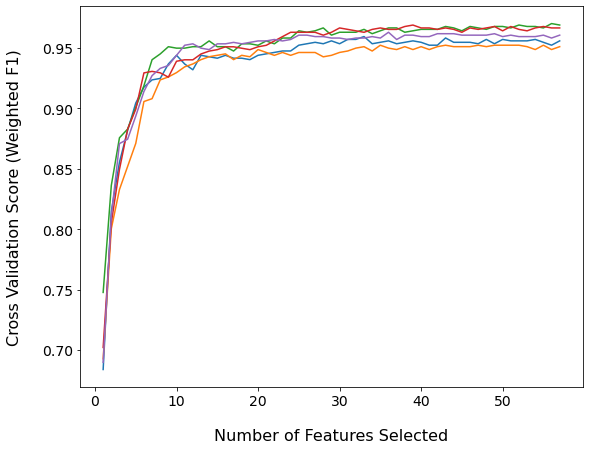

In [ ]:
#Here, I use RFECV to identify the optimal number of features that should be used to maximize the weighted F1 score, 
#and then I plot the results showing my model's weighted F1 scores per number of features used in the model.

import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV


min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator = RandomForestClassifier(criterion='entropy', 
                                       max_depth=32, 
                                       max_features=0.07017543859649122, 
                                       min_samples_leaf=1, 
                                       n_estimators=1000, 
                                       random_state=64),
    step=1,
    cv=KFold(5),
    scoring="f1_weighted",
    min_features_to_select=min_features_to_select,
    n_jobs=-1
)
rfecv.fit(X_train_scaled, y_train)


print("Optimal number of features : %d" % rfecv.n_features_)

#Plot of the number of features vs. cross validation scores
plt.figure(figsize=(9, 7))
plt.xlabel("Number of Features Selected", fontsize=16, labelpad=20)
plt.ylabel("Cross Validation Score (Weighted F1)", fontsize=16, labelpad=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [ ]:
import pickle
pickle.dump(rfecv, open("rfecv.pkl", "wb"))

In [ ]:
'''
rfecv = pickle.load(open("rfecv.pkl", "rb"))

### Here we can see the optimal number of features to maximize the weighted F1 score is 43. However, the graph shows that after about 10 -12 features, there is very little improvement in the model's weighted F1 score. In a production environment, it can be better to keep models relatively simple in terms of the amount of data used for training and prediction to save time and data storage resources. I will therefore seek to find the top 12 features both through RFECV and through the Random Forest Classifier's built-in feature importance identification technique - Mean Decrease in Impurity (MDI). Both techniques are briefly explained further below.

In [ ]:
#The following code prints out the index numbers of the features found to be least important (i.e., not part of the optimal 
#set of features), and then drops these features from X. Since the optimal number of features was found to be 43, and since 
#there are 57 total features, the 44th - 57th most predictive features are the ones that are dropped from X.

print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 3 13 14 21 30 31 33 37 39 40 42 46 47 50]


C:\Users\rsb84\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
X.shape

(4601, 43)

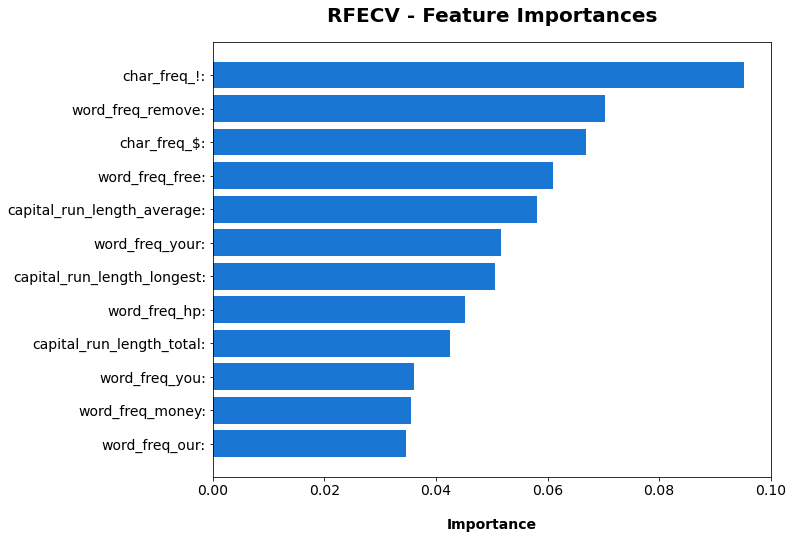

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=True).tail(12) 
#This sorts feature importance values from smallest to greatest. Taking the tail(12) gives me the 12 largest feature importance values. 
#An alternative way to create the chart would be to use ascending=False and then use head(12). However, this would have resulted in the
#chart showing the least important of the 12 most important features first and the most important feature last, which would have looked awkward. 


plt.figure(figsize=(10, 8))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, fontweight='bold', labelpad=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [4]:
#Next, I subset the original X dataframe to list only the top 12 features found by RFECV:
X_top_12_rfecv = X[['char_freq_!:','word_freq_remove:','char_freq_$:','word_freq_free:','capital_run_length_average:','word_freq_your:','capital_run_length_longest:','word_freq_hp:','capital_run_length_total:','word_freq_you:','word_freq_money:','word_freq_our:']]
X_top_12_rfecv.head()

,char_freq_!:,word_freq_remove:,char_freq_$:,word_freq_free:,capital_run_length_average:,word_freq_your:,capital_run_length_longest:,word_freq_hp:,capital_run_length_total:,word_freq_you:,word_freq_money:,word_freq_our:
0,0.778,0.00,0.000,0.32,3.756,0.96,61,0.0,278,1.93,0.00,0.32
1,0.372,0.21,0.180,0.14,5.114,1.59,101,0.0,1028,3.47,0.43,0.14
2,0.276,0.19,0.184,0.06,9.821,0.51,485,0.0,2259,1.36,0.06,1.23
3,0.137,0.31,0.000,0.31,3.537,0.31,40,0.0,191,3.18,0.00,0.63
4,0.135,0.31,0.000,0.31,3.537,0.31,40,0.0,191,3.18,0.00,0.63


In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=64)
X_sm_top_12_rfecv, y_sm = smote.fit_resample(X_top_12_rfecv, y)

print(pd.Series(y_sm).value_counts(normalize=True))

1    0.5
0    0.5
Name: spam, dtype: float64


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm_top_12_rfecv, y_sm, random_state=64)

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

rf_top_12_rfecv = RandomForestClassifier(criterion='entropy', max_depth=32, max_features=4, min_samples_leaf=1, n_estimators=1000, random_state=64)
rf_top_12_rfecv.fit(X_train_scaled, y_train)

#A) Scoring the model using K-fold cross validation data with the number of folds = 5

print("Random Forest Classification - K-fold Cross Validation F1 Score (Scaled): {:.4f}".format(np.mean(cross_val_score(
    RandomForestClassifier(criterion='entropy',
                           max_depth=32,
                           max_features=4,
                           min_samples_leaf=1,
                           n_estimators=1000,
                           random_state=64),
                           X_train_scaled, 
                           y_train, 
                           cv=5, 
                           scoring='f1_weighted', 
                           n_jobs=-1))))
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
#B) Scoring the model on test set data directly

y_preds_top_12_rfecv_rf = rf_top_12_rfecv.predict(X_test_scaled)
print("Random Forest Classification Test Set F1 Score (Scaled): {:.4f}".format(f1_score(y_test, y_preds_top_12_rfecv_rf, average='weighted')))

Random Forest Classification - K-fold Cross Validation F1 Score (Scaled): 0.9397
Random Forest Classification Test Set F1 Score (Scaled): 0.9469



### Using the top 12 features identified by RFECV instead of the full set of 57 features results in the K-fold cross validation F1 score decreasing from 0.9615 to **<u>0.9397</u>**.



---

### I now recreate my Random Forests model comprising the full set of features, and then use Random Forest's built-in feature importance technique - Mean Decrease in Impurity (MDI).

In [9]:
#Because I had to earlier delete the fourteen least important feature columns from X in order to plot the top ranked 
#RFECV feature results, I now need to restore X to its original 57 features before recreating my Random Forest model 
#which used the full set of features:

y = df['spam']
X = df.loc[:, df.columns != 'spam']

X.shape

(4601, 57)

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=64)
X_sm, y_sm = smote.fit_resample(X, y)

print(pd.Series(y_sm).value_counts(normalize=True))

1    0.5
0    0.5
Name: spam, dtype: float64


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=64)

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_all = RandomForestClassifier(criterion='entropy', max_depth=32, max_features=4, min_samples_leaf=1, n_estimators=1000, random_state=64)
rf_all.fit(X_train_scaled, y_train)

#A) Scoring the model using K-fold cross validation data with the number of folds = 5

print("Random Forests Classification - K-fold Cross Validation F1 Score (Scaled): {:.4f}".format(np.mean(cross_val_score(
    RandomForestClassifier(criterion='entropy', 
                           max_depth=32, 
                           max_features=4, 
                           min_samples_leaf=1, 
                           n_estimators=1000, 
                           random_state=64), 
                           X_train_scaled, 
                           y_train, 
                           cv=5, 
                           scoring='f1_weighted', 
                           n_jobs=-1))))

#B) Scoring the model on test set data directly

y_preds_all_rf = rf_all.predict(X_test_scaled)
print("Random Forests Test Set F1 Score (Scaled): {:.4f}".format(f1_score(y_test, y_preds_all_rf, average='weighted')))

Random Forests Classification - K-fold Cross Validation F1 Score (Scaled): 0.9615
Random Forests Test Set F1 Score (Scaled): 0.9649


### **Description of Random Forest Classifier's Feature Importance Technique - Mean Decrease in Impurity (MDI):**

$~$

### Random Forests determines a given feature's importance by first finding the level of node importance by calculating the amount of total decision tree impurity decreased in a given node multiplied by the probability of each observation reaching that node. E.g., supposing that a single Random Forest decision tree has just two child nodes, the equation for each child node's level of importance for that tree is first calculated by $ni_{j}$ = $w_{j}C_{j}$ - $w_{left(j)}C_{left(j)}$ - $w_{right(j)}C_{right(j)}$ where $ni_{j}$ is the level of node j's importance, $w_{j}$ is the weighted number of observations ending up in node j, $C_{j}$ is the level of impurity found in node j, left(j) is the left most child node resulting from node j's split, and right(j) is the right most child node resulting from the split. Then each feature's level of importance ($f_{i}$) in a given decision tree is calculated using the formula:




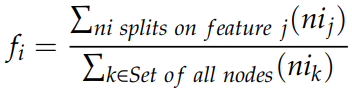

### $f_{i}$ is then normalized to values between 0 and 1 using the formula:

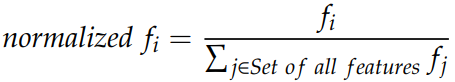

### The sum is then taken of ***normalized*** $f_{i}$ across all nodes involving feature ***i*** for *each* decision tree, and then the total sum of ***normalized*** $f_{i}$ for all decision trees in the ensemble are averaged together.

$~$

### It is important to keep in mind that "decision tree impurity decreased in a given node" (mentioned above) can be measured by either the gini index function or entropy function for classification problems. Both measures of impurity are similar to each other, and there is often no clear cut answer as to which function is best to use. However, I tuned for which impurity measurement function maximized the F1 score using GridSearchCV, and found that entropy works best for the model which included the *full set* of features from the dataset.


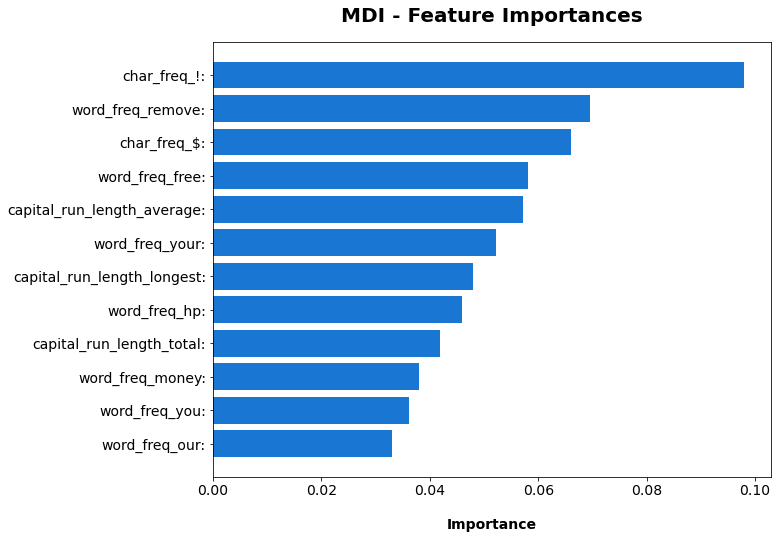

In [ ]:
from matplotlib import pyplot as plt

dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rf_all.feature_importances_

dset = dset.sort_values(by='importance', ascending=True).tail(12)


plt.figure(figsize=(10, 8))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('MDI - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, fontweight='bold', labelpad=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

### As seen further above, each of the top 12 features identified by RFECV to be the model's most predictively strong features are also among the top 12 features identified by MDI; in fact, both feature importance techniques rank the top 12 features in almost the exact same order of importance. There is therefore no need to rerun another Random Forest model with the top 12 features found by MDI to compare its performance with the Random Forest model using the RFECV-based top 12 features, since they would be the exact same model.

---

### **Part 15:** 

### Lastly, I would like to propose a variable that currently is not in the dataset, which if included, would likely increase my final model's predictive power.

---

---


### **Answer:** 

### I believe that adding a variable called ***word_freq_survey***, which is not included in the present data set, would increase my weighted F1 scores. The reason is that many spam emails are intended to get recipients to respond to survey questions, including survey questions about customer satisfaction as well as political surveys and surveys about consumer behavior. The variable word_freq_survey would need to measure the percentage of words in a given email that match the words "survey" or "surveys".

